In [39]:
import pandas as pd
from sodapy import Socrata
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [40]:
client = Socrata("data.cityofnewyork.us", None)
WQData = client.get("8c3c-yspd")
WQDATA_df = pd.DataFrame.from_records(WQData)

In [41]:
#Show the first 8 rows
WQDATA_df.head(8)

,average_24hrturbidity_ntu,coliform_fecal_fc_100ml,date,site,turbidity_ntu_at_12am,turbidity_ntu_at_12pm,turbidity_ntu_at_4am,turbidity_ntu_at_4pm,turbidity_ntu_at_8am,turbidity_ntu_at_8pm
0,0.94,<1,2015-05-27T00:00:00.000,DEL18DT,0.8,1.1,0.95,0.95,0.95,0.9
1,0.71,<1,2015-08-28T00:00:00.000,DEL18DT,0.7,0.7,0.65,0.75,0.65,0.8
2,0.56,<1,2015-08-15T00:00:00.000,DEL18DT,0.6,0.5,0.55,0.6,0.55,0.55
3,0.73,1,2015-08-27T00:00:00.000,DEL18DT,0.7,0.65,0.7,0.8,0.75,0.8
4,0.86,<1,2015-05-31T00:00:00.000,DEL18DT,0.95,0.8,0.85,0.85,0.85,0.85
5,0.73,<1,2015-08-31T00:00:00.000,DEL18DT,0.8,0.6,0.8,0.65,0.8,0.7
6,0.53,<1,2015-08-16T00:00:00.000,DEL18DT,0.55,0.5,0.5,0.5,0.6,0.5
7,0.69,<1,2015-09-04T00:00:00.000,DEL18DT,0.7,0.7,0.65,0.65,0.85,0.6


In [46]:
WQDATA_df.columns

Index([u'average_24hrturbidity_ntu', u'coliform_fecal_fc_100ml', u'date',
       u'site', u'turbidity_ntu_at_12am', u'turbidity_ntu_at_12pm',
       u'turbidity_ntu_at_4am', u'turbidity_ntu_at_4pm',
       u'turbidity_ntu_at_8am', u'turbidity_ntu_at_8pm'],
      dtype='object')

In [47]:
#Reduce dataframe
WQDATA_df.drop(columns=['site', 'turbidity_ntu_at_4am',
       'turbidity_ntu_at_8am', 'turbidity_ntu_at_12pm',
       'turbidity_ntu_at_4pm', 'turbidity_ntu_at_8pm', 'coliform_fecal_fc_100ml'], inplace=True)

In [48]:
#Display the top 8 rows of reducted df
WQDATA_df.head(8)

,average_24hrturbidity_ntu,date,turbidity_ntu_at_12am
0,0.94,2015-05-27T00:00:00.000,0.8
1,0.71,2015-08-28T00:00:00.000,0.7
2,0.56,2015-08-15T00:00:00.000,0.6
3,0.73,2015-08-27T00:00:00.000,0.7
4,0.86,2015-05-31T00:00:00.000,0.95
5,0.73,2015-08-31T00:00:00.000,0.8
6,0.53,2015-08-16T00:00:00.000,0.55
7,0.69,2015-09-04T00:00:00.000,0.7


In [49]:
#my chosen dataset has a date column, so I still use the same dateset for the extra credit assignment
#change the format of dates
#change the data type of "average_24hrturbidity_ntu" and "turbidity_ntu_at_12am"
WQDATA_df["date"] = WQDATA_df["date"].apply(lambda x: pd.Timestamp(x))
WQDATA_df["average_24hrturbidity_ntu"] = WQDATA_df["average_24hrturbidity_ntu"].apply(lambda x: float(x))
WQDATA_df["turbidity_ntu_at_12am"] = WQDATA_df["turbidity_ntu_at_12am"].apply(lambda x: float(x))

In [50]:
#Display the processed df
WQDATA_df.head(8)

,average_24hrturbidity_ntu,date,turbidity_ntu_at_12am
0,0.94,2015-05-27,0.80
1,0.71,2015-08-28,0.70
2,0.56,2015-08-15,0.60
3,0.73,2015-08-27,0.70
4,0.86,2015-05-31,0.95
5,0.73,2015-08-31,0.80
6,0.53,2015-08-16,0.55
7,0.69,2015-09-04,0.70


Text(0.5,1,'Change of Average 24hr Turbidity by Time 2015 - 2017')

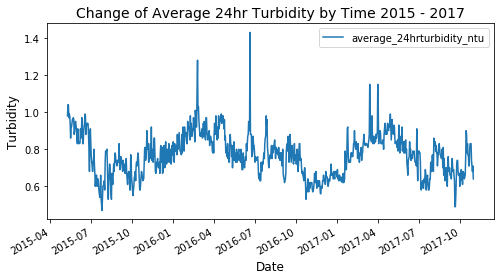

In [51]:
ax = WQDATA_df.plot(x='date', y='average_24hrturbidity_ntu',figsize= (8,4),fontsize = 10)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Turbidity",fontsize=12)
ax.set_title("Change of Average 24hr Turbidity by Time 2015 - 2017",fontsize=14)

Figure 1: Change of Average 24hr Turbidity by Time 2015 - 2017. Shown that there's not a clear trend, which means the average 24hr Turbidity does not increase or decrease over the two years. But there's potental seasonality which needs further analysis to prove.

Text(0.5,1,'Change of Turbidity at 12am by Time 2015 - 2017')

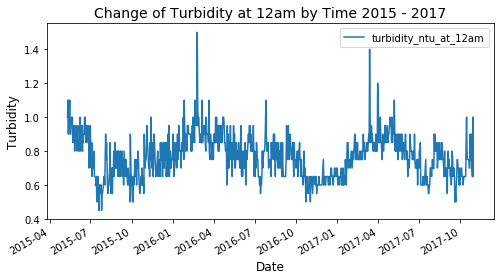

In [52]:
ax = WQDATA_df.plot(x='date', y='turbidity_ntu_at_12am', figsize= (8,4), fontsize = 10)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Turbidity",fontsize=12)
ax.set_title("Change of Turbidity at 12am by Time 2015 - 2017", fontsize=14)

Figure 2: Change of Turbidity at 12am by Time 2015 - 2017. Shown that there's not a clear trend, which means the Turbidity at 12am does not increase or decrease over the two years. But there's potental seasonality which needs further analysis to prove.